In [7]:
import os
import zipfile

local_zip = 'C:/Users/dell ap/Desktop/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/dell ap/Desktop/')
zip_ref.close()

local_zip = 'C:/Users/dell ap/Desktop/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/dell ap/Desktop/')
zip_ref.close()

In [ ]:
AKSHARDHAM_dir = os.path.join('C:/Users/dell ap/Desktop/train/AKSHARDHAM_IMAGES')
india_gate_dir = os.path.join('C:/Users/dell ap/Desktop/train/india_gate')
lotus_temple_dir = os.path.join("C:/Users/dell ap/Desktop/train/loutus_temple")
qutub_minar_dir = os.path.join('C:/Users/dell ap/Desktop/train/qutub_minar')
RED_FORT_dir = os.path.join('C:/Users/dell ap/Desktop/train/RED FORT')

print('total training AKSHARDHAM images:', len(os.listdir(AKSHARDHAM_dir)))
print('total training india gate images:', len(os.listdir(india_gate_dir)))
print('total training lotus temple images:', len(os.listdir(lotus_temple_dir)))
print('total training qutub minar images:', len(os.listdir(qutub_minar_dir)))
print('total training RED FORT images:', len(os.listdir(RED_FORT_dir)))

AKSHARDHAM_files = os.listdir(AKSHARDHAM_dir)
print(AKSHARDHAM_files[:10])

india_gate_files = os.listdir(india_gate_dir)
print(india_gate_files[:10])

lotus_temple_files = os.listdir(lotus_temple_dir)
print(lotus_temple_files[:10])

qutub_minar_files = os.listdir(qutub_minar_dir)
print(qutub_minar_files[:10])

RED_FORT_files = os.listdir(RED_FORT_dir)
print(RED_FORT_files[:10])

total training AKSHARDHAM images: 408
total training india gate images: 425
total training lotus temple images: 116
total training qutub minar images: 367
total training RED FORT images: 976
['AKSHARDHAM IMAGES_10.jpeg', 'AKSHARDHAM IMAGES_100.jpeg', 'AKSHARDHAM IMAGES_101.jpeg', 'AKSHARDHAM IMAGES_102.jpeg', 'AKSHARDHAM IMAGES_103.jpeg', 'AKSHARDHAM IMAGES_104.jpeg', 'AKSHARDHAM IMAGES_105.jpeg', 'AKSHARDHAM IMAGES_106.jpeg', 'AKSHARDHAM IMAGES_108.jpeg', 'AKSHARDHAM IMAGES_109.png']
['india gate_1.png', 'india gate_10.jpeg', 'india gate_100.jpeg', 'india gate_101.jpeg', 'india gate_102.jpeg', 'india gate_103.jpeg', 'india gate_106.jpeg', 'india gate_107.jpeg', 'india gate_108.jpeg', 'india gate_109.jpeg']
['loutus temple_104.jpeg', 'loutus temple_105.jpeg', 'loutus temple_108.jpeg', 'loutus temple_109.jpeg', 'loutus temple_112.jpeg', 'loutus temple_113.jpeg', 'loutus temple_124.jpeg', 'loutus temple_125.jpeg', 'loutus temple_129.jpeg', 'loutus temple_133.jpeg']
['1.jpg', '10.jpg', '1

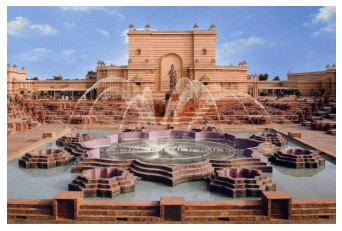

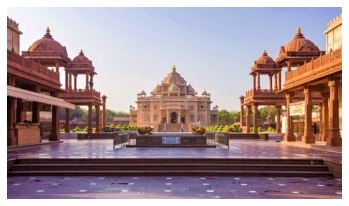

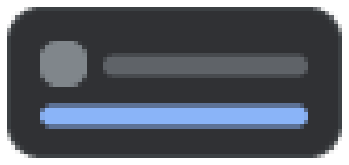

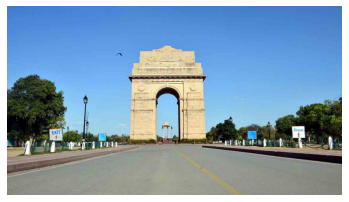

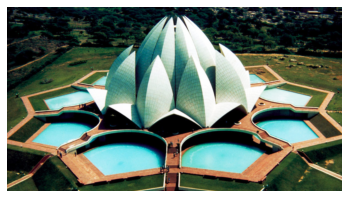

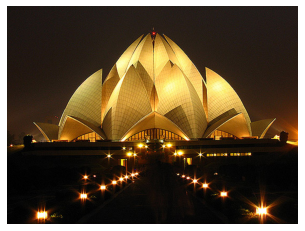

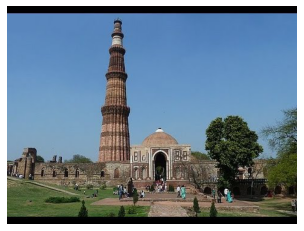

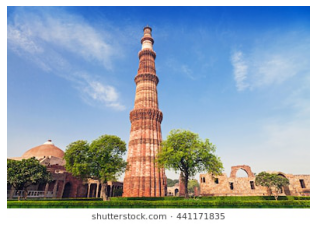

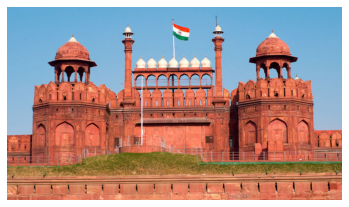

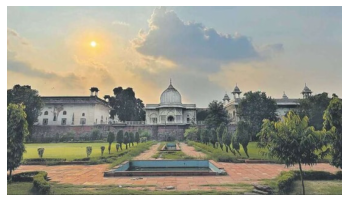

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_AKSHARDHAM = [os.path.join(AKSHARDHAM_dir, fname) 
                for fname in AKSHARDHAM_files[pic_index-2:pic_index]]
next_india_gate = [os.path.join(india_gate_dir, fname) 
                for fname in india_gate_files[pic_index-2:pic_index]]
next_lotus_temple = [os.path.join(lotus_temple_dir, fname) 
                for fname in lotus_temple_files[pic_index-2:pic_index]]
next_qutub_minar = [os.path.join(qutub_minar_dir, fname) 
                for fname in qutub_minar_files[pic_index-2:pic_index]]
next_RED_FORT = [os.path.join(RED_FORT_dir, fname) 
                for fname in RED_FORT_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_AKSHARDHAM+next_india_gate+next_lotus_temple+next_qutub_minar+next_RED_FORT):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import os
from PIL import Image
folder_path = 'C:/Users/dell ap/Desktop/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:/Users/dell ap/Desktop/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Users/dell ap/Desktop/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(50, 50),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(50 , 50),
	class_mode='categorical',
  batch_size=16
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50 , 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=1)

model.save("train.h5")

Found 2283 images belonging to 5 classes.
Found 704 images belonging to 5 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 128)         73856     
                                     

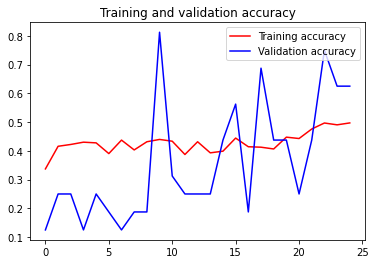

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()